In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [3]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
df.shape

(7043, 21)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
customer_5 = df['Dependents']
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [15]:
customer_15 =df['StreamingMovies']

In [16]:
senior_male_electronic = df[(df['SeniorCitizen'] == 1) & (df['gender'] == 'Male') & (df['PaymentMethod']== 'Electronic check')]
senior_male_electronic.shape

(298, 21)

In [17]:
customer_total_tenure = df[(df['tenure'] > 70) & (df['MonthlyCharges'] > 100)]
customer_total_tenure.shape

(175, 21)

In [18]:
#Extract all the customers whose contract is of two years, payment method 
#is mailed check and the value of churn is ‘Yes’ and store the result in
#‘two_mail_yes’

two_mail_yes = df[(df['Contract'] == 'Two Year') & (df['PaymentMethod'] == 'Mailed Check') & (df['Churn'] == 'Yes')] 
two_mail_yes.shape

(0, 21)

In [19]:
#Extract 333 random records from the customer_churndataframe and store
#the result in ‘customer_333’
customer_333 = df.sample(n=333,random_state = 45)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5851,4118-CEVPF,Female,1,No,No,35,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.80,3836.30,No
843,6549-NNDYT,Female,0,No,No,13,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),30.85,394.10,No
5442,2481-SBOYW,Female,0,No,Yes,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.00,1498.35,No
4792,7067-KSAZT,Female,1,Yes,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.25,6979.80,Yes
2303,7377-DMMRI,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,47.80,92.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No
3391,7234-KMNRQ,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.00,73.45,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
862,0947-MUGVO,Male,1,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.65,1463.50,Yes


In [20]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [21]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [22]:
internet_service_counts = df['InternetService'].value_counts()

Text(0.5, 1.0, 'Distribution of Internet Service')

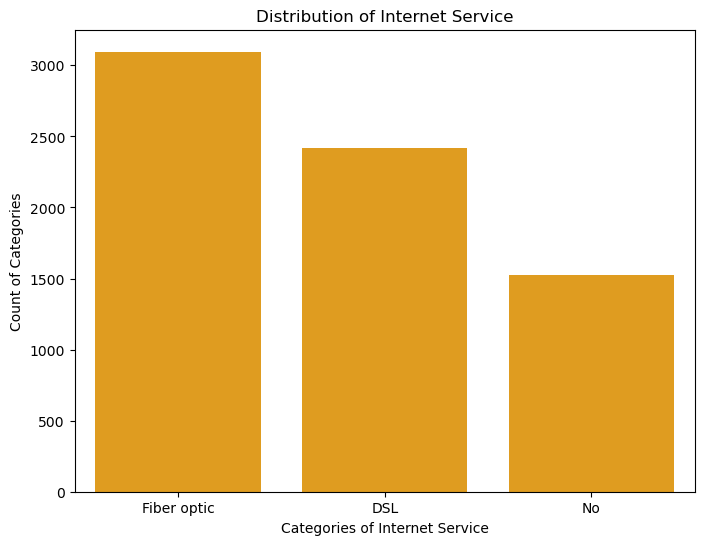

In [23]:
#Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange

plt.figure(figsize = (8,6))
sns.barplot(x = internet_service_counts.index, y = internet_service_counts.values, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

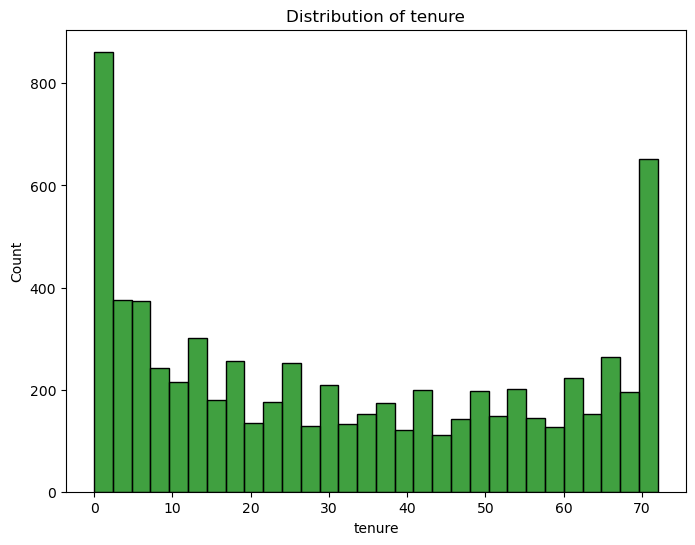

In [24]:
#Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure'

plt.figure(figsize = (8,6))
sns.histplot(x = 'tenure', bins = 30, color = 'green', data = df)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

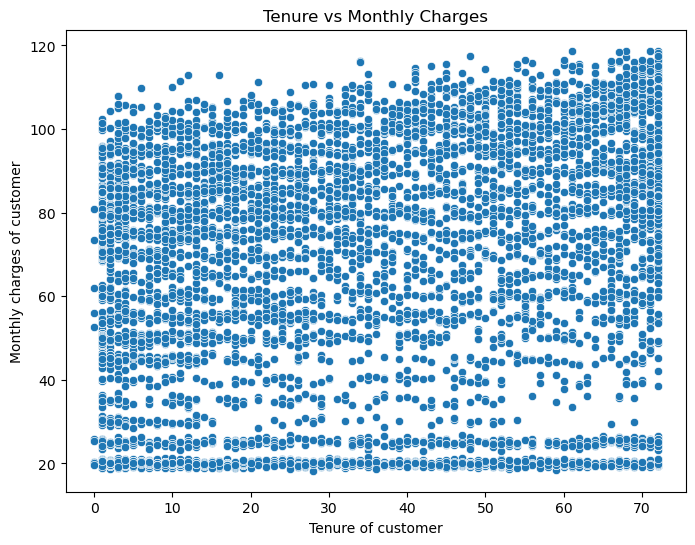

In [25]:
#Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’

plt.figure(figsize= (8,6))
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = df)
plt.xlabel ('Tenure of customer')
plt.ylabel ('Monthly charges of customer')
plt.title ('Tenure vs Monthly Charges')



Text(0.5, 1.0, 'Tenure vs Contract')

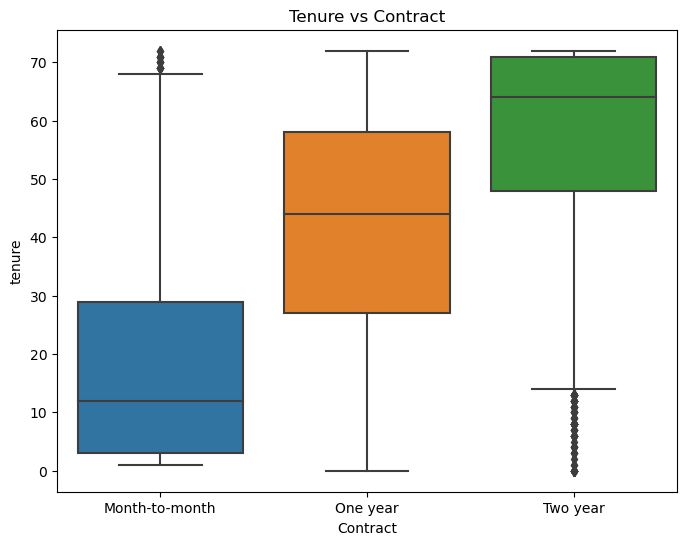

In [26]:
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & 'Contract' on x-axis

plt.figure(figsize= (8,6))
sns.boxplot(x = 'Contract', y = 'tenure', data = df)
plt.title('Tenure vs Contract')


In [27]:
# Linear Regression:
# Build a simple linear model where dependent variable is ‘MonthlyCharges’
#and independent variable is ‘tenure’:
#a. Divide the dataset into train and test sets in 70:30 ratio.
#b. Build the model on train set and predict the values on test set
#c. After predicting the values, find the root mean square error
#d. Find out the error in prediction & store the result in ‘error’
#e. Find the root mean square error

x = df[['tenure']]
y = df['MonthlyCharges']


In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 22)

In [29]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

LinearRegression()

In [30]:
linreg.intercept_

54.444954604793566

In [31]:
linreg.coef_

array([0.31656915])

In [32]:
y_pred = linreg.predict(xtest)
y_pred

array([56.97750784, 72.80596555, 75.02194963, ..., 74.07224217,
       67.42428993, 75.02194963])

In [33]:
mse = mean_squared_error(ytest, y_pred)
mse

884.1121442073257

In [34]:
rmse = np.sqrt(mse)
rmse

29.734023343761027

In [35]:
error = ytest-y_pred
error

6187   -36.827508
6448    31.844034
5492   -49.721950
2028   -39.593492
5376   -36.393199
          ...    
5983   -11.059476
3690    -7.892614
855     26.077758
5187    36.975710
5094    14.828050
Name: MonthlyCharges, Length: 2113, dtype: float64

In [36]:
#Build a simple logistic regression model where dependent variable is
#‘Churn’ and independent variable is ‘MonthlyCharges’:
#a. Divide the dataset in 65:35 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and get the accuracy score
#d. Build a multiple logistic regression model where dependent variable
#is ‘Churn’ and independent variables are ‘tenure’ and
#‘MonthlyCharges’
#e. Divide the dataset in 80:20 ratio
#f. Build the model on train set and predict the values on test set
#g. Build the confusion matrix and get the accuracy score


df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0) 

In [37]:
x = df[['MonthlyCharges']]
y = df['Churn']

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.35, random_state = 55)

In [39]:
logreg = LogisticRegression(fit_intercept = True, max_iter = 10000)
logreg.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [40]:
logreg.coef_

array([[0.0149416]])

In [41]:
y_pred = logreg.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
print(f"Accuracy Score: {accuracy_score(ytest, y_pred)*100}")

Accuracy Score: 72.66828872668289


In [43]:
print(f"Error Rate: {(1 - accuracy_score(ytest, y_pred))*100}")

Error Rate: 27.331711273317115


In [44]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[1792,    0],
       [ 674,    0]], dtype=int64)

In [45]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1792
           1       0.00      0.00      0.00       674

    accuracy                           0.73      2466
   macro avg       0.36      0.50      0.42      2466
weighted avg       0.53      0.73      0.61      2466



In [46]:
x = df[['MonthlyCharges', 'tenure']]
y = df['Churn']

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 33)

In [48]:
logreg = LogisticRegression(fit_intercept = True, max_iter = 10000)
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [49]:
logreg.coef_

array([[ 0.03316095, -0.05499923]])

In [50]:
ypred = logreg.predict(xtest)
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred)*100}")

Accuracy Score: 78.77927608232788


In [52]:
print(f"Error Rate: {(1 - accuracy_score(ytest, ypred))*100}")

Error Rate: 21.220723917672114


In [53]:
cm = confusion_matrix(ytest, ypred)
cm

array([[941,  85],
       [214, 169]], dtype=int64)

In [54]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1026
           1       0.67      0.44      0.53       383

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



In [55]:
#Decision Tree:
#Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
#a. Divide the dataset in 80:20 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [56]:
x = df[['tenure']]
y = df['Churn']

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 28)

In [58]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [59]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

ytrain_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
ytest_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [61]:
print(accuracy_score(ytest, ytest_pred))

0.7636621717530163


In [62]:
print(accuracy_score(ytrain, ytrain_pred))

0.7539936102236422


In [63]:
cm = confusion_matrix(ytest, ytest_pred)
cm

array([[966,  87],
       [246, 110]], dtype=int64)

In [64]:
print(clf.get_depth())

12


In [65]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [66]:
results = []
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(xtrain, ytrain)
    ytest_pred = model.predict(xtest)
    acc_score = accuracy_score(ytest, ytest_pred) * 100
    results.append({'max_depth': input_parameter, 'accuracy': acc_score})

df1 = pd.DataFrame(results)
print(df1)

    max_depth   accuracy
0           1  74.733854
1           2  75.301632
2           3  76.366217
3           4  76.011356
4           5  75.656494
5           6  76.366217
6           7  76.366217
7           8  76.366217
8           9  76.366217
9          10  76.366217
10         11  76.366217
11         12  76.366217
12         13  76.366217
13         14  76.366217
14         15  76.366217


In [67]:
acc_score = accuracy_score(ytest,ytest_pred)*100
acc_score

76.36621717530163

In [68]:
#Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
#a. Divide the dataset in 70:30 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy
from sklearn.ensemble import RandomForestClassifier

x = df[['MonthlyCharges', 'tenure']]
y = df['tenure']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 46)

In [70]:
clf1 = RandomForestClassifier(n_estimators=500) 
clf1.fit(xtrain,ytrain) 
ytest_pred1=clf1.predict(xtest)


In [71]:
c1 = confusion_matrix(ytest, ytest_pred1)
c1

array([[  3,   0,   0, ...,   0,   0,   0],
       [  0, 193,   0, ...,   0,   0,   0],
       [  0,   0,  67, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  23,   0,   0],
       [  0,   0,   0, ...,   0,  55,   0],
       [  0,   0,   0, ...,   0,   0, 106]], dtype=int64)

In [72]:
a1 = accuracy_score(ytest, ytest_pred1)
a1

0.6961665877898722

In [73]:
n=[100,200,300,400,500,600,700,800,900,1000]
accuracy_l = []
for i in n:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    a=accuracy_score(ytest,pred)
    accuracy_l.append(a)
accuracy_l

[0.7008991954566967,
 0.6876478939895883,
 0.7094178892569806,
 0.705631803123521,
 0.7032654992901088,
 0.7027922385234264,
 0.6980596308566019,
 0.6985328916232845,
 0.7008991954566967,
 0.7046852815901562]